In [1]:
import numpy as np
import pandas as pd
from pyjstat import pyjstat
import requests
import json

In [2]:
def hent_dataset(filnavn):
    with open(filnavn, 'r') as file:
        ssbAPIdata = json.load(file)

    postUrl = ssbAPIdata["postUrl"]
    tabellnummer = ssbAPIdata["tableIdForQuery"]
    query = ssbAPIdata["queryObj"]
    print(f"Henter data fra tabell {tabellnummer}")
    response = requests.post(postUrl, json=query)

    if response.status_code == 200:
        print("Data hentet: OK")
    else:
        print(f"""Data kunne ikke hentes, feilkode {response.status_code}
        Responstekst: response.text""")
        return None

    dataset = pyjstat.Dataset.read(response.text)
    df = dataset.write("dataframe")
    df_id = dataset.write("dataframe", naming="id")

    print(f"""Hentet dataset: {dataset['label']}""")
    return df, df_id, dataset


df, df_id, ds = hent_dataset("boligindeks.json")
df_copy = df.copy()


Henter data fra tabell 11386
Data hentet: OK
Hentet dataset: 11386: Prisindeks for nye boliger, etter boligtype, statistikkvariabel og kvartal


In [3]:
df = df_copy.copy()
df = df.drop(columns="statistikkvariabel")

#ny_kvartal = []
#for kvartal in df["kvartal"]:
#    ny_kvartal.append(kvartal.replace("K", "Q"))

#df["kvartal"] = pd.PeriodIndex(ny_kvartal, freq="Q")

def formaterKvartal(kvartalsstreng):
    ny_streng = kvartalsstreng.replace("K", "Q")
    return ny_streng

df["kvartal"] =  pd.PeriodIndex(df["kvartal"].map(formaterKvartal), freq="Q")

df = df.pivot(index="kvartal", columns="boligtype", values="value")

df = df.dropna()
#df[~df["Flerbolig"].isna()]
df_kjop_copy = df.copy()

In [4]:
df, df_id, _ = hent_dataset("byggekost.json")
df_copy = df.copy()

Henter data fra tabell 08653
Data hentet: OK
Hentet dataset: 08653: Byggekostnadsindeks for einebustad av tre (2015=100), etter arbeidstype, statistikkvariabel og måned


In [5]:
df = df_copy.copy()
df= df.drop(columns="statistikkvariabel")
df["måned"] = pd.to_datetime(df["måned"], format="%YM%m")
df["måned"] = df["måned"].dt.to_period("Q")
df = df.groupby(["arbeidstype", "måned"]).mean()
df = df.reset_index().rename(columns={"måned": "kvartal"})\
    .pivot(index="kvartal", columns="arbeidstype", values="value")
df_mat = df
df_copy = df_mat.copy()

,Einebustad av tre i alt,"Einebustad av tre i alt, materialar",Eneboliger,Flerbolig
kvartal,,,,
2011Q1,87.400000,86.700000,81.1,79.9
2011Q2,88.300000,87.900000,84.9,79.6
2011Q3,88.666667,88.233333,86.4,79.3
2011Q4,89.533333,89.200000,86.0,84.9
2012Q1,90.300000,89.833333,86.9,84.6
2012Q2,91.066667,90.866667,89.3,88.5
2012Q3,91.633333,91.500000,90.7,85.9
2012Q4,92.333333,92.066667,89.4,90.5
2013Q1,93.000000,92.733333,90.5,93.2


<Axes: xlabel='kvartal'>

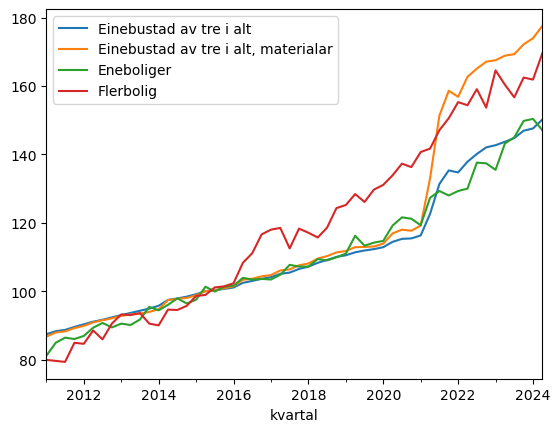

In [13]:
df_mat = df_copy.copy()
df_kjop = df_kjop_copy.copy()

df_tot = pd.merge(df_mat, df_kjop, left_index=True, right_index=True, how='inner')
display(df_tot)

df_tot.corr()

df_tot.plot()

<Axes: xlabel='Eneboliger', ylabel='Einebustad av tre i alt'>

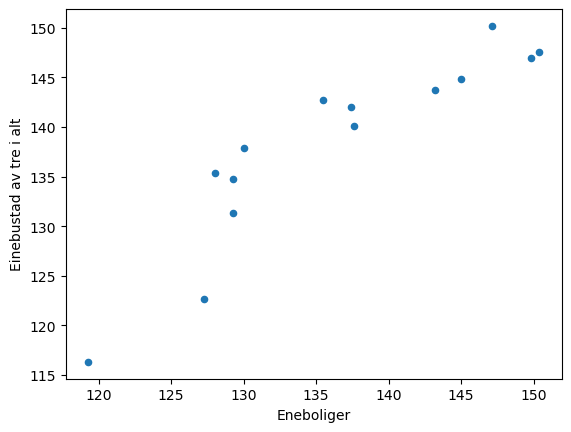

In [141]:
import matplotlib.pyplot as plt


In [1]:
from sklearn.linear_model import LinearRegression



ModuleNotFoundError: No module named 'sklearn'

In [183]:
import statsmodels.formula.api as smf


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Eneboliger   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1742.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.17e-41
Time:                        11:48:23   Log-Likelihood:                -138.63
No. Observations:                  54   AIC:                             281.3
Df Residuals:                      52   BIC:                             285.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0923      2.682     -0.034      0.973      -5.475       5.290
EneboligTotInd     0.9955      0.024     41.733      0.000       0.948       1.043
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.099
Skew:                          -0.103   Prob(JB):                        0.952
Kurtosis:                       2.959   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
df, df_id, ds = hent_dataset("annet-vinningsbrudd.json")
df_copy = df.copy()

Henter data fra tabell 08635
Data hentet: OK
Hentet dataset: 08635: Personoffer for anmeldte lovbrudd, etter lovbruddstype, kjønn, statistikkvariabel og år


<Axes: xlabel='år'>

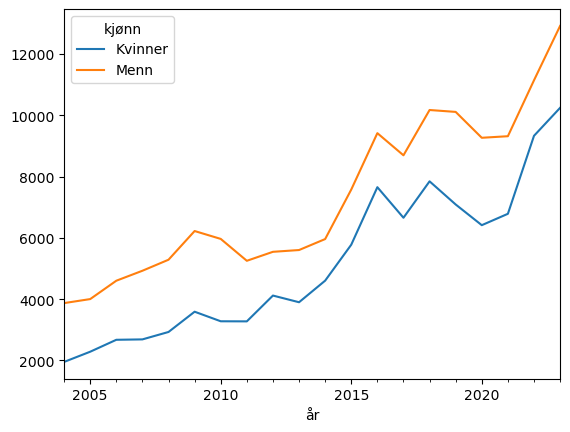

In [190]:
df = df_copy.copy()
df = df.drop(columns=["lovbruddstype", "statistikkvariabel"])
df["år"] = pd.PeriodIndex(df["år"], freq="Y")
df = df.pivot(index="år", columns="kjønn", values="value")
df["Totalt"] = df["Kvinner"]+df["Menn"]
df[["Kvinner", "Menn"]].plot()

In [191]:
import  scipy.stats as spstat




2.652449014603229 0.005797757505063613
Nullhypotese forkastes: Menn er mer sannynlig å være offer for annen vinningskriminalitet


In [195]:
#Binomialtest
display(df)


kjønn,Kvinner,Menn,Totalt
år,,,
2004,1953,3872,5825
2005,2286,4003,6289
2006,2675,4602,7277
2007,2688,4927,7615
2008,2930,5287,8217
2009,3591,6223,9814
2010,3279,5966,9245
2011,3276,5252,8528
2012,4118,5545,9663


p-verdi = 7.975605003855948e-42


In [197]:
#Utdanningsnivå

df, df_id, ds = hent_dataset("utdanningsnivå.json")
df_copy = df.copy()

Henter data fra tabell 12407
Data hentet: OK
Hentet dataset: 12407: Månedslønn, etter statistikkmål, utdanningsnivå, statistikkvariabel og år


In [199]:
df=df_copy.copy()
df["år"] = pd.PeriodIndex(df["år"], freq="Y")
df = df.pivot(index=["statistikkmål", "år"], columns=["utdanningsnivå"], values="value")
df["Høyere utdanning"] = df["Universitets- og høgskoleutdanning, 1-4 år (nivå 6)"]+df["Universitets- og høgskoleutdanning, over 4 år (nivå 7-8)"]
df=df.drop(columns=["Universitets- og høgskoleutdanning, 1-4 år (nivå 6)", "Universitets- og høgskoleutdanning, over 4 år (nivå 7-8)"])
df = df.astype({"Høyere utdanning": "float64"})
snitt = df.loc["Gjennomsnitt", "Høyere utdanning"]/2
sum = df.loc["Antall arbeidsforhold med lønn", "Høyere utdanning"]
ny = pd.concat([sum, snitt])
ny.index = df.index
df["Høyere utdanning"] = ny
df

utdanningsnivå                       Utdanningsnivå i alt  Høyere utdanning
statistikkmål                  år                                          
Antall arbeidsforhold med lønn 2015               2613125          996912.0
                               2016               2705298         1039177.0
                               2017               2756595         1068854.0
                               2018               2817311         1103435.0
                               2019               2859034         1148116.0
                               2020               2808827         1168361.0
                               2021               2938173         1224604.0
                               2022               3014011         1262234.0
                               2023               3044125         1250191.0
Gjennomsnitt                   2015                 42580           52335.0
                               2016                 43640           53245.0
                               2017                 44660           54355.0
                               2018                 46010           55940.0
                               2019                 47720           57630.0
                               2020                 48750           58260.0
                               2021                 50790           60815.0
                               2022                 53150           63415.0
                               2023                 56360           67725.0

In [1]:
# t-tester


